# 05 Feature space

## TODO

- Sæt labels på x og y aksen
- QOL lav nearst neighbor lidt pænere

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fasttext

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [4]:
data = pd.read_csv('./data/sklearn.csv')

model = fasttext.load_model('./data/fasttext_trained_model.bin')
data['vec'] = data['review'].apply(lambda x: model.get_sentence_vector(x))

In [6]:
# modellen kan her finde de ord der er tættes på parametret 
print(model.get_nearest_neighbors('dårlig'))

print(model.get_nearest_neighbors('utilfreds'))

print(model.get_nearest_neighbors('glad'))


[(0.9996507167816162, 'annulleret'), (0.9985558390617371, 'gøre'), (0.998344898223877, 'vide'), (0.9979313015937805, 'kontakt'), (0.9978191256523132, 'gavekort'), (0.9975382685661316, 'kunder'), (0.9975085258483887, 'annullere'), (0.997432291507721, 'væk'), (0.9971287846565247, 'total'), (0.9966180324554443, 'modtager')]
[(0.996745765209198, ',dårlig'), (0.9958456754684448, 'ringe'), (0.9953691363334656, 'betalt'), (0.9953064918518066, 'forkerte'), (0.9948042631149292, 'brugte'), (0.9944220185279846, 'se'), (0.9942518472671509, 'umuligt'), (0.994130551815033, 'pludselig'), (0.9940638542175293, 'kurv'), (0.9935813546180725, 'færdig')]
[(0.9944089651107788, 'sendte'), (0.9858633279800415, 'synes'), (0.9851084351539612, 'grund'), (0.9845572710037231, 'før'), (0.9844586849212646, ',jeg'), (0.9829312562942505, 'bruge.'), (0.9814688563346863, 'varen.'), (0.9807887673377991, 'heller'), (0.9802990555763245, 'for.'), (0.9797580242156982, 'har.')]


In [5]:
kmeans = KMeans(n_clusters=5)
data['cluster'] = kmeans.fit_predict(data['vec'].values.tolist())

3    1478
0     791
4     761
2     448
1     162
Name: cluster, dtype: int64


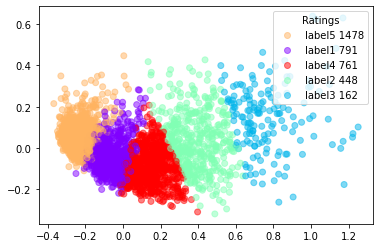

In [9]:
pca = PCA(n_components=3)
data['x'] = pca.fit_transform(data['vec'].values.tolist())[:,0]
data['y'] = pca.fit_transform(data['vec'].values.tolist())[:,1]
data['z'] = pca.fit_transform(data['vec'].values.tolist())[:,2]

scatter = plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='rainbow', alpha=0.5)

# dc = data_cluster
# cc = cluster_colors
# cl = cluster_labels
print(data['cluster'].value_counts())
dc = data['cluster'].value_counts()
dc = -np.sort(-dc)
cc = data['cluster'].value_counts().index.tolist()

cl = []
for i in model.labels:
    cl.append(i.replace('__',''))

handles = scatter.legend_elements(num=cc)[0]  # extract the handles from the existing scatter plot

plt.legend(title='Ratings', handles=handles,  
           labels=[cl[0]+' '+str(dc[0]),
                   cl[1]+' '+str(dc[1]),
                   cl[2]+' '+str(dc[2]),
                   cl[3]+' '+str(dc[3]),
                   cl[4]+' '+str(dc[4])])

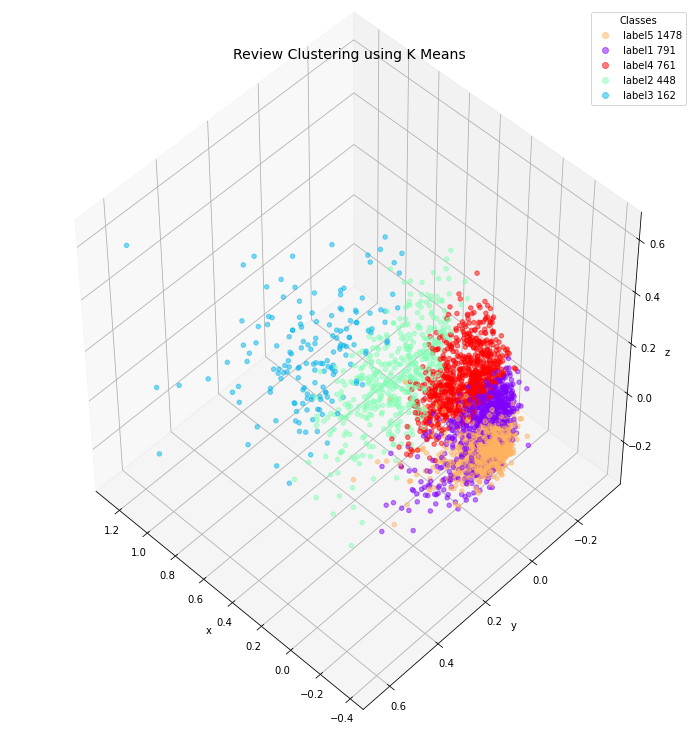

In [13]:
fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(data['x'],data['y'],data['z'], c=data['cluster'], cmap='rainbow', alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("Review Clustering using K Means", fontsize=14)
plt.legend(title='Classes', handles=handles, 
           labels=[cl[0]+' '+str(dc[0]),
                   cl[1]+' '+str(dc[1]),
                   cl[2]+' '+str(dc[2]),
                   cl[3]+' '+str(dc[3]),
                   cl[4]+' '+str(dc[4])])